# Requirements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

2025-03-11 19:58:15.719376: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-11 19:58:15.730751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741719495.746331    6807 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741719495.751124    6807 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 19:58:15.770416: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Define the train and test dataset.

In [2]:
train_dir = "dataset/train"
test_dir = "dataset/test"

Define the constants.

In [3]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

Define data augmentation and rescaling for the training dataset.

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

Define rescaling the test dataset.

In [5]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

Load the training data.

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training",
)

Found 480 images belonging to 2 classes.


Load the validation data.

In [7]:
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation",
)

Found 119 images belonging to 2 classes.


Load the test data.

In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False,
)

Found 197 images belonging to 2 classes.


In [9]:
print("Class indices:", train_generator.class_indices)

Class indices: {'notumor': 0, 'tumor': 1}


Define the model.

In [10]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

/home/peshevskidimitar/.pyenv/versions/ml-workshop/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1741719497.985041    6807 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Compile the model.

In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Train the model.

In [12]:
history = model.fit(
    train_generator,
    epochs=16,
    validation_data=val_generator
)

/home/peshevskidimitar/.pyenv/versions/ml-workshop/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/16


I0000 00:00:1741719500.055616    6987 service.cc:148] XLA service 0x7f2b90003da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741719500.055682    6987 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-03-11 19:58:20.094465: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741719500.289784    6987 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:18 6s/step - accuracy: 0.5625 - loss: 0.6863

I0000 00:00:1741719504.483666    6987 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - accuracy: 0.5898 - loss: 0.7905 - val_accuracy: 0.9832 - val_loss: 0.5165
Epoch 2/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.7807 - loss: 0.5476 - val_accuracy: 0.9916 - val_loss: 0.1441
Epoch 3/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.8058 - loss: 0.4403 - val_accuracy: 0.9832 - val_loss: 0.1287
Epoch 4/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.8912 - loss: 0.2980 - val_accuracy: 0.9076 - val_loss: 0.2416
Epoch 5/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.8412 - loss: 0.3444 - val_accuracy: 0.9664 - val_loss: 0.1391
Epoch 6/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.8626 - loss: 0.3194 - val_accuracy: 0.9580 - val_loss: 0.1106
Epoch 7/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.8662 - loss: 0.3046 - val_accuracy: 0.9832 - val_loss: 0.1089
Epoch 8/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.8745 - loss: 0.2923 - val_accuracy: 0.9832 - val

Plot the training history.

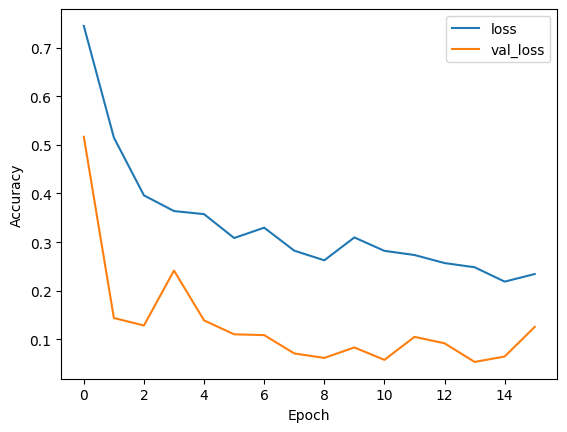

In [13]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Save the model.

In [14]:
model.save("brain_tumor_cnn_model.h5")

Evaluate the model on the test data.

In [15]:
test_loss, test_acc = model.evaluate(test_generator)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9050 - loss: 0.2274
Test Accuracy: 0.8426
Test Loss: 0.3413


In [16]:
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int)

y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=["Not Tumor", "Tumor"]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
              precision    recall  f1-score   support

   Not Tumor       0.77      0.99      0.86       100
       Tumor       0.99      0.69      0.81        97

    accuracy                           0.84       197
   macro avg       0.88      0.84      0.84       197
weighted avg       0.87      0.84      0.84       197



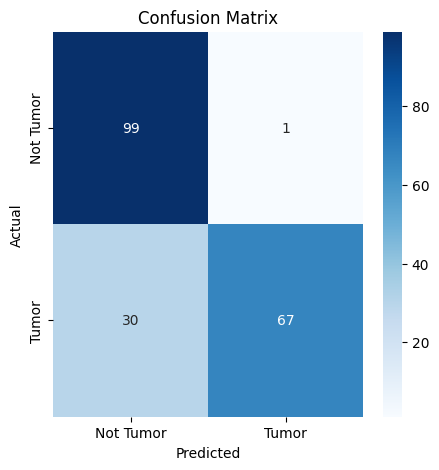

In [17]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Tumor", "Tumor"], yticklabels=["Not Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Load the saved model.

In [18]:
model = load_model("brain_tumor_cnn_model.h5")

In [19]:
def preprocess_image(image_path, img_size=(150, 150)):
    """Load and preprocess an image for prediction."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

In [20]:
def predict_image(image_path):
    """Predict if an MRI scan shows a tumor or not."""
    img = preprocess_image(image_path)
    prediction = model.predict(img)[0][0]
    
    if prediction > 0.5:
        print(f"The model predicts: **Tumor** (Confidence: {prediction:.2f})")
    else:
        print(f"The model predicts: **No Tumor** (Confidence: {1 - prediction:.2f})")

In [21]:
image_path = "image-4.jpg" 
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
The model predicts: **Tumor** (Confidence: 0.51)
